### Image
height, width, channels
channels : R, G, B, transparency (0 = transparant, 100 = niet transparant)
    zwart = 0 , 0 , 0 , 255

In [50]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import os
from IPython.display import clear_output
import time

def prepare_image():
    """
    Takes a crop off the original Pickle Rick image, without the transparant fields and the scales
        
    Returns:
        np.ndarray: Pickle Rick, centered with a black background
    """
    loc_input_img = os.path.join('13 - Assignment','opdracht_image_manipulation','image_raw.png')
    i = Image.open(loc_input_img) # Open the image and convert it to a NumPy array
    np_image_original = np.array(i)
    np_image_resized = np_image_original[12:97, 22:107]
    return np_image_resized

def display_image(image, show_axis=True):
    """
    Displays an image using Matplotlib.

    Parameters:
    ----------
    image : ndarray
        The image to be displayed, typically a NumPy array.
    show_axis : bool, optional
        Whether to display the axis grid lines and labels. Defaults to True.

    Returns:
    -------
    None
        This function does not return a value. It renders the image in a Matplotlib figure window.
    """
    plt.imshow(image)
    if (not show_axis):
        plt.axis('off') 
    plt.show()
    
def resize_image_by_factor(image, factor=2):
    """
    Resizes the image with a factor, by replication of each pixel 'factor'-times, for rows and columns

    Parameters:
    ----------
    image : ndarray
        The image to be displayed, typically a NumPy array.
    factor : int
        Default = 2

    Returns:
    -------
    Resized image
    """
    stretched_horizontal = np.repeat(image, factor, axis=0) # repeat each item 'factor' times along axis 0 (vertical, rows)
    stretched_horizontal_vertical = np.repeat(stretched_horizontal, factor, axis=1) # repeat each item 'factor' times along axis 1 (horizontal, columns)
    return stretched_horizontal_vertical

def resize_image_by_factor_manual_way(image, factor=2):
    """
    Resizes the image with a factor, by replication of each pixel 'factor'-times, for rows and columns

    Parameters:
    ----------
    image : ndarray
        The image to be displayed, typically a NumPy array.
    factor : int
        Default = 2

    Returns:
    -------
    Resized image
    """
    
    row, columns, _ = image.shape
    new_result_by_factor = []
    
    # duplicate columns and rows
    for row_index in range(row):
        new_row_by_factor = []
        for column_index in range(columns): # repetition of columns
            for repetition in range(factor):
                new_row_by_factor.append(image[row_index][column_index])
        for repetition in range(factor): # repetition of our new row
            new_result_by_factor.append(new_row_by_factor)
    return np.array(new_result_by_factor)

def flip_left_right(image):
    return image[::, ::-1]

def flip_upside_down(image):
    return image[::-1]

def flip_image(image, flip_transformation):
    image_flipped = image.copy()
    if flip_transformation == 1:
        image_flipped = flip_left_right(image)
    elif flip_transformation == 2:
        image_flipped = flip_upside_down(image)
    elif flip_transformation == 3:
        image_flipped = flip_upside_down(flip_left_right(image))
    return image_flipped

def grid_with_flips(image = prepare_image(), matrix = np.repeat(np.arange(4).reshape(4,1),7,axis=1)):
    """
    Creates raster of an image. Raster inResizes the image manually by duplicating rows and columns based on the given factor.

    Args:
        image (np.ndarray): The original image as a NumPy array.
        matrix (np.ndarray): A matrix with numeric values that correspond to the flip. (default raster of 4 rows with echt 7 columns. Each row corresponds to flip from 0, 1, 2, 3)
        0: image not flipped, 1: flip left right, 2: flip upside down and 3: flip left right and upside down

    Returns:
        np.ndarray: The raster with flipped images, according to the matrix
    """
    
    raster = []
    
    # fill raster with image objects
    for row in matrix: 
        row_images = []
        for transformation in row:
            row_images.append(flip_image(image, transformation))
        raster.append(np.hstack(row_images))
    
    return np.vstack(raster)

def change_color_image(image, color):
    
    #gaat de alle kleurkanalen behalve die van parameter color met een bepaalde factor verminderen
    # bv. color='r' -> kanalen blauw en groen worden met 95% verminderd
    new_image=image.copy()
    #maak een dictionary die voor elke kleur aangeeft welke kanalen moeten verminderd worden met een bepaalde factor
    channeldict={'r':(1,2), 'g':(0,2), 'b':(0,1), 'x':()}
    
    for i in channeldict[color] :
        new_image[0:,0:, i]=new_image[0:,0:, i]*0.05
   
    return new_image
    
def replace_black_with_random_color(image):
    
    # Create a mask for black pixels (threshold for black: RGB <= 30)
    mask = (image[:, :, 0] <= 30) & (image[:, :, 1] <= 30) & (image[:, :, 2] <= 30) # 2D mask (85,85), for each pixel in image


    # Generate random colors for pixel -> R, G, B, transparent (only for black pixels) -> index 0: aantal pixels die we moeten vervangen, index 1 RGB waarden
    random_colors = np.random.randint(0, 256, size=(np.sum(mask), 4), dtype=np.uint8)

    # Replace black pixels with random colors
    result_image = image.copy()
    result_image[mask] = random_colors # broadcasting van de 4 kanalen met random values in de posities van de mask

    return result_image

def create_colorful_big_one(image, colors = ['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r', 'r'], flips = [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]):
    """
    Creates a raster with the big original image with original colors in the middle, surrounded by colored little images. Color is defined by a list of colors, and will be assigned clockwise
    
    Args: 
        colors: list of colors (b for blue, r for red, g for green) 
        
    Returns:
        np.ndarray: The big image, surrounded by colored ones
    """
    
    colors_verify_input = [colors[i] if i < len(colors) else 'x' for i in range(0,12)]
    flips_verify_input = [flips[i] if i < len(flips) else 'x' for i in range(0,12)]
    
    top_row = np.hstack([change_color_image(flip_image(image, flips[i]), colors_verify_input[i]) for i in range(0,4)])
    
    middle_row_left = np.vstack([change_color_image(flip_image(image, flips[i]), colors_verify_input[i]) for i in range(11,9,-1)])
    middle_row_right = np.vstack([change_color_image(flip_image(image, flips[i]), colors_verify_input[i]) for i in range(4,6)])
    
    middle_row = np.hstack([middle_row_left, resize_image_by_factor_manual_way(image, 2), middle_row_right])
    bottom_row = np.hstack([change_color_image(flip_image(image, flips[i]), colors_verify_input[i]) for i in range(9,5,-1)]) # todo, feitelijk de andere richting
    
    return np.vstack((top_row, middle_row, bottom_row))

def transform_to_grayscale(image):
    """
    An image can be transformed to grayscale with the formula "0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue" on each RGB channel. Transparancy stays 255
    """
    gray_color = np.array(image[:, :, [0]]*0.299 + image[:, :, [1]]*0.587 + image[:, :, [2]]*0.114, dtype=np.uint8).reshape(85,85) # 85,85,1 -> 85,85

    gray_scale_image = np.zeros(image.shape, dtype=np.uint8)
    gray_scale_image[:, :, 0] = gray_color
    gray_scale_image[:, :, 1] = gray_color
    gray_scale_image[:, :, 2] = gray_color
    gray_scale_image[:, :, 3] = 255
    
    return gray_scale_image
    
def release_pixels_cycle(image_covered, image_original, cycle, cycle_count):
    
    volgnummers = np.arange(0,image_original.shape[0]*image_original.shape[1],dtype=np.uint8).reshape(image_original.shape[0], image_original.shape[1])
    mask = volgnummers % cycle_count == cycle
    
    image_covered[mask] = image_original[mask]
    
    return image_covered

def een_spelleke(image, aantal_vragen=5):
    """
    This starts a game with a number of easy questions (default 5). For every good answer, a part of the image gets revealed in color, every faulty answer gives a gray reveal
    
    Args: 
        image (np.ndarray): The image as a NumPy array.
        aantal_vragen: Number of questions in the game (default 5)
        
    Returns:
        np.ndarray: The image. How much pixels are revealed is depending on the number of good questions
    """
    
    image_covered = image.copy()
    image_covered[:,:,:] = 0
    image_grayscale = transform_to_grayscale(image)
    vragenlijst = {"Hoeveel zijden heeft een vierkant": "4",
            "Welk fruit is geel en krom":"banaan",
            "Welk dier zegt 'miauw'?" : "kat",
            "Wat is de kleur van de lucht op een heldere dag?" : "blauw",
            "Hoeveel dagen zitten er in een week" : "7",
            "Hoeveel poten heeft een spin": "8",
            "Welk dier is bekend om zijn lange nek": "giraf",
            "Hoeveel vingers heeft een mens normaalgezien": "10"            
            }

    print(f"Ben je benieuwd welke afbeelding hieronder verstopt zit? Speel dan ons spel mee en geef een antwoorde op de volgende vragen")
    display_image(image_covered)
    clear_output(True)
    
    
    correct_answers = 0
    for i in range(aantal_vragen):
        vraag = list(vragenlijst.keys())[i]
        user_input = input(f"Vraag {i + 1}/{aantal_vragen}: {vraag} ")
        
        if (user_input.lower() == vragenlijst[vraag].lower()):
            print(f"'{user_input}' is correct !!!!!")
            image_covered = release_pixels_cycle(image_covered, image, i, aantal_vragen)
            display_image(image_covered)
            clear_output(True)
            correct_answers += 1
        else:
            print(f"Fout. Je antwoord was '{user_input}', maar het correcte antwoord is {vragenlijst[vraag]}")
            image_covered = release_pixels_cycle(image_covered, image_grayscale, i, aantal_vragen)
            display_image(image_covered)
            clear_output(True)            
        if (i == aantal_vragen - 1):
            time.sleep(2)
            print(f"Je had {correct_answers} vragen correct en {aantal_vragen - correct_answers} fout beantwoord. Zie hieronder het eindresultaat")

            display_image(image_covered)


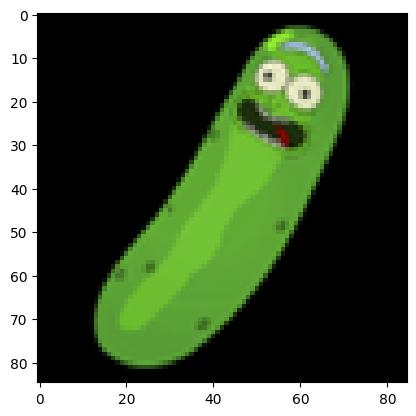

In [ ]:
# Bert
image = prepare_image()
display_image(image)

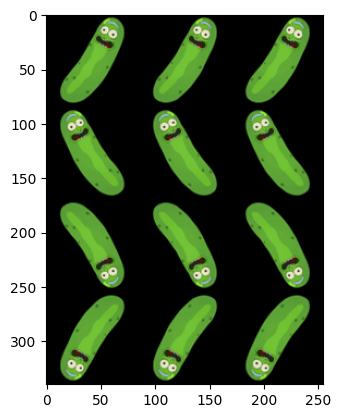

In [ ]:
# Denis
flips = np.array([[0,0,0],[1,1,1],[2,2,2],[3,3,3]])
display_image(grid_with_flips(image, flips))

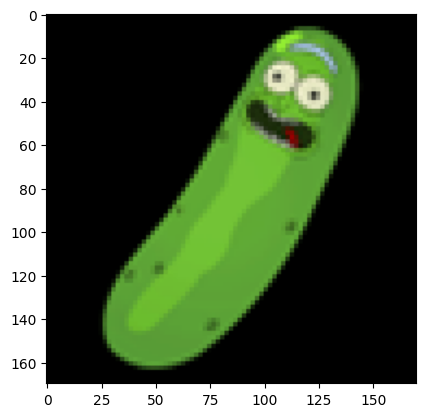

In [53]:
# Annelies
# display_image(resize_image_by_factor(image, 2))
display_image(resize_image_by_factor_manual_way(image, 2))

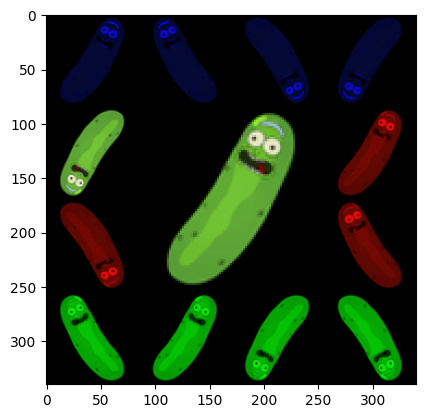

In [ ]:
# Bert 
colors_incomplete = ['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r']
colors = ['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r', 'r']
flips = [0,0,0,0,0,0,0,0,0,0,0,0]
display_image(create_colorful_big_one(image, colors_incomplete, flips))

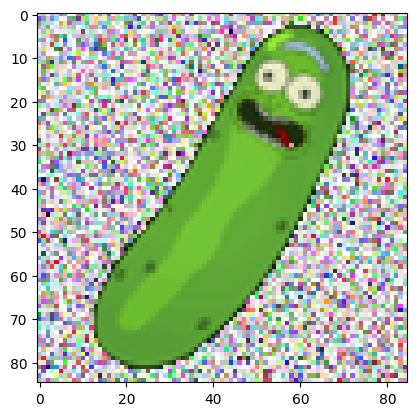

In [ ]:
# Denis
display_image(replace_black_with_random_color(image))

In [56]:
# Annelies
een_spelleke(prepare_image())